In [1]:
## Resolution effects on the acceleration

In [2]:
%pylab inline
import biff
from scipy import special
import pygadgetreader
import reading_snapshots
#import gala
from gadget_read_snap import read_snap

Populating the interactive namespace from numpy and matplotlib


In [3]:
r_s_sims = 40.85
G_gadget=43007.1 #kpc3/(Gyr2Msun)/1E10. 

In [4]:
font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)


In [7]:
snap_gadget_1e6 = read_snap('./MW/gadget3_MW5_100M_b1_dmhalopart_elgato_1e6_001')
acc_gadget_1e6 = snap_gadget_1e6[2]
pos_gadget_1e6 = snap_gadget_1e6[0]
pot_gadget_1e6 = snap_gadget_1e6[1]


256
12000000 blocksize pp
4000000 blocksize ids
4000000 blocksize mass


In [8]:
snap_gadget_1e8 = read_snap('./MW/gadget3_MWLMC5_100M_b1_dmhalopart_elgato_1e8_001')
acc_gadget_1e8 = snap_gadget_1e8[2]
pos_gadget_1e8 = snap_gadget_1e8[0]
pot_gadget_1e8 = snap_gadget_1e8[1]

256
1200000000 blocksize pp
400000000 blocksize ids
400000000 blocksize mass


In [9]:
#r_sims_6 = (pos_gadget_1e6[:,0]**2 + pos_gadget_1e6[:,1]**2 + pos_gadget_1e6[:,2]**2)**0.5
r_sims_8 = (pos_gadget_1e8[:,0]**2 + pos_gadget_1e8[:,1]**2 + pos_gadget_1e8[:,2]**2)**0.5

#a_sims_6 = (acc_gadget_1e6[:,0]**2 + acc_gadget_1e6[:,1]**2 + acc_gadget_1e6[:,2]**2)**0.5
a_sims_8 = (acc_gadget_1e8[:,0]**2 + acc_gadget_1e8[:,1]**2 + acc_gadget_1e8[:,2]**2)**0.5

In [10]:
def a_r(r, a, bins, rmax):
    r_bin = np.linspace(min(r), rmax, bins)
    a_mean = np.zeros(bins)
    a_std = np.zeros(bins)
    for i in range(bins-1):
        dr = np.where((r>r_bin[i]) & (r<r_bin[i+1]))[0]
        a_mean[i] = np.nanmean(a[dr])
        a_std[i] = np.nanstd(a[dr])
    return r_bin, a_mean, a_std
        

In [11]:
#rbins6, a_mean6, a_std6 = a_r(r_sims_6, a_sims_6, 100, 300 )
rbins8, a_mean8, a_std8 = a_r(r_sims_8, a_sims_8, 100, 300 )

NameError: name 'rbins6' is not defined

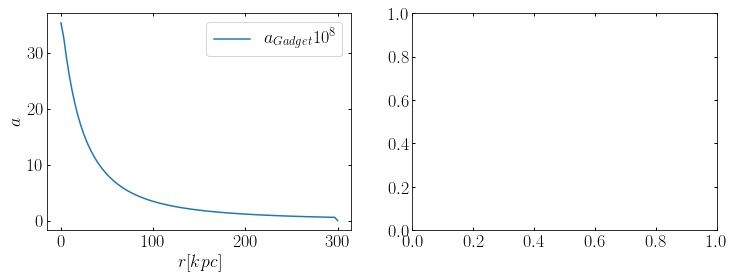

In [9]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1,2,1)
#ax1.plot(rbins6, a_mean6, label='$a_{Gadget} 10^6$')
ax1.plot(rbins8, a_mean8/100., label='$a_{Gadget} 10^8$')
ax1.legend()
ax1.set_xlabel(r'$r[kpc]$')
ax1.set_ylabel(r'$a$')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(rbins6, 100*np.abs(a_mean6-a_mean8/100.)/(a_mean8/100.))
ax2.set_xlabel(r'$r[kpc]$')
ax2.set_ylabel(r'$\Delta a$')

savefig('delta_a_gadget_dif_res.pdf', bbox_inches='tight')

# BFE

In [12]:
## Reading coefficients 
coeff_c = np.loadtxt('./MW/MW_bfe_b1_1e6.txt')
S_mw_1e6 = coeff_c[:,0]
T_mw_1e6 = coeff_c[:,1]

S_matrix_mw_1e6 = np.zeros((21, 21, 21))
T_matrix_mw_1e6 = np.zeros((21, 21, 21))


counter = 0
for n in range(21):
    for l in range(21):
        for m in range(l+1):
            S_matrix_mw_1e6[n][l][m] = S_mw_1e6[counter]
            T_matrix_mw_1e6[n][l][m] = T_mw_1e6[counter]
            counter +=1

In [13]:
coeff_opt = np.loadtxt('./BFE/MW_opt_coeff_smooth.txt')
S_mw_1e6_opt = coeff_opt[:,0]
T_mw_1e6_opt = coeff_opt[:,1]

#S_matrix_mw_1e6_opt = np.zeros((21, 21, 21))
#T_matrix_mw_1e6_opt = np.zeros((21, 21, 21))

S_matrix_mw_1e6_opt = S_mw_1e6_opt.reshape((21, 21, 21))
T_matrix_mw_1e6_opt = T_mw_1e6_opt.reshape((21, 21, 21))

#counter = 0
#for n in range(21):
#    for l in range(21):
#        for m in range(l+1):
#            S_matrix_mw_1e6_opt[n][l][m] = S_mw_1e6_opt[counter]
#            T_matrix_mw_1e6_opt[n][l][m] = T_mw_1e6_opt[counter]
#            counter +=1

In [14]:
## Reading coefficients 
coeff_c = np.loadtxt('../../SCF_tools/PCA/MWLMC5_coeff_20_20_100M_b1.txt')
S_mw_1e8 = coeff_c[:,0]
T_mw_1e8 = coeff_c[:,1]

S_matrix_mw_1e8 = np.zeros((21, 21, 21))
T_matrix_mw_1e8 = np.zeros((21, 21, 21))


counter = 0
for n in range(21):
    for l in range(21):
        for m in range(0, l+1):
            S_matrix_mw_1e8[n][l][m] = S_mw_1e8[counter]
            T_matrix_mw_1e8[n][l][m] = T_mw_1e8[counter]
            counter +=1

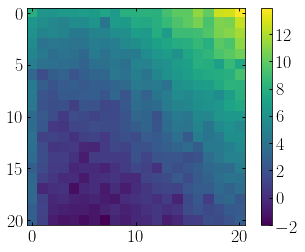

In [15]:
imshow(np.log10(np.abs(S_matrix_mw_1e8[:,:,0])))
colorbar()

In [16]:
#N_rand_1e6 = np.random.randint(0, 1000000, 10000)
N_rand_1e8 = np.random.randint(0, 100000000, 10000)

In [17]:
a_all = biff.gradient(np.ascontiguousarray(np.double(pos_gadget_1e8[N_rand_1e8])), 
                    S_matrix_mw_1e6, T_matrix_mw_1e6, G=G_gadget, M=1, r_s=r_s_sims)

In [18]:
a_opt = biff.gradient(np.ascontiguousarray(np.double(pos_gadget_1e8[N_rand_1e8])), 
                    np.ascontiguousarray(S_matrix_mw_1e6_opt), 
                      np.ascontiguousarray(T_matrix_mw_1e6_opt), G=G_gadget, M=1, r_s=r_s_sims)

In [19]:
a_all8 = biff.gradient(np.ascontiguousarray(np.double(pos_gadget_1e8[N_rand_1e8])), 
                    S_matrix_mw_1e8, T_matrix_mw_1e8, G=G_gadget, M=1, r_s=r_s_sims)

In [20]:
#r_rand_1e6 = (pos_gadget_1e6[N_rand_1e6,0]**2 + pos_gadget_1e6[N_rand_1e6,1]**2 + pos_gadget_1e6[N_rand_1e6,2]**2)**0.5
r_rand_1e8 = (pos_gadget_1e8[N_rand_1e8,0]**2 + pos_gadget_1e8[N_rand_1e8,1]**2 + pos_gadget_1e8[N_rand_1e8,2]**2)**0.5

In [21]:
a_mag_6 = (a_all[:,0]**2 + a_all[:,1]**2 + a_all[:,2]**2)**0.5 
a_opt = (a_opt[:,0]**2 + a_opt[:,1]**2 + a_opt[:,2]**2)**0.5 
a_mag_8 = (a_all8[:,0]**2 + a_all8[:,1]**2 + a_all8[:,2]**2)**0.5 

In [22]:
rbins6_bfe, a_mean6_bfe, a_std6_bfe = a_r(r_rand_1e8, a_mag_6, 100, 300)
rbins6_bfe_opt, a_mean6_bfe_opt, a_std6_bfe_opt = a_r(r_rand_1e8, 
                                                      a_opt, 100, 300)

rbins8_bfe, a_mean8_bfe, a_std8_bfe = a_r(r_rand_1e8, a_mag_8, 100, 300)

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


Text(0,0.5,'$\\Delta a$')

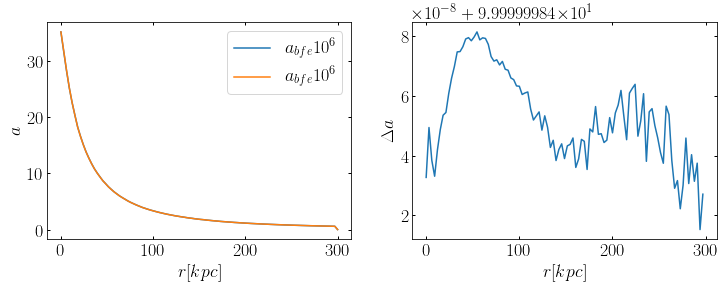

In [23]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(rbins6_bfe, a_mean6_bfe, label='$a_{bfe} 10^6$')
ax1.plot(rbins6_bfe_opt, a_mean6_bfe_opt, label='$a_{bfe} 10^6$')
#ax1.plot(rbins8_bfe, a_mean8_bfe, label='$a_{bfe} 10^8$')
ax1.legend()
ax1.set_xlabel(r'$r[kpc]$')
ax1.set_ylabel(r'$a$')

ax1 = fig.add_subplot(1,2,2)
ax1.plot(rbins6_bfe, 100*np.abs(a_mean6_bfe-a_mean8_bfe)/(a_mean8_bfe), )
ax1.set_xlabel(r'$r[kpc]$')
ax1.set_ylabel(r'$\Delta a$')
#savefig('delta_a_bfe_dif_res.pdf', bbox_inches='tight')

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Text(0,0.5,'$\\Delta a$')

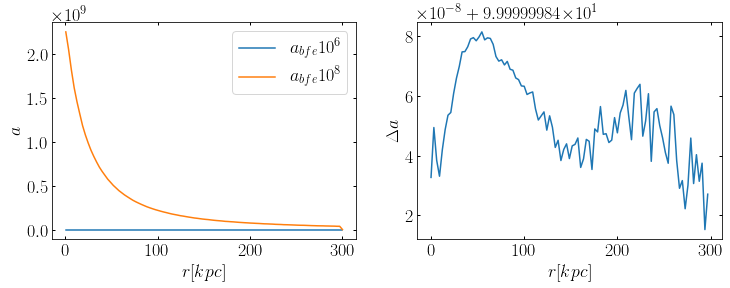

In [24]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(rbins6_bfe, a_mean6_bfe, label='$a_{bfe} 10^6$')
ax1.plot(rbins8_bfe, a_mean8_bfe, label='$a_{bfe} 10^8$')
ax1.legend()
ax1.set_xlabel(r'$r[kpc]$')
ax1.set_ylabel(r'$a$')

ax1 = fig.add_subplot(1,2,2)
ax1.plot(rbins6_bfe, 100*np.abs(a_mean6_bfe-a_mean8_bfe)/(a_mean8_bfe), )
ax1.set_xlabel(r'$r[kpc]$')
ax1.set_ylabel(r'$\Delta a$')
#savefig('delta_a_bfe_dif_res.pdf', bbox_inches='tight')

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


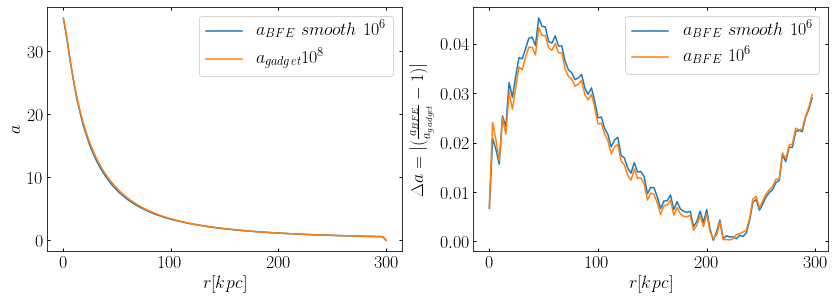

In [96]:
fig = plt.figure(figsize=(14, 4.5))

ax1 = fig.add_subplot(1,2,1)
#ax1.plot(rbins6_bfe, a_mean6_bfe, label='$a_{BFE}\ smooth\ 10^6$')
ax1.plot(rbins6_bfe_opt, a_mean6_bfe_opt, label='$a_{BFE}\ smooth\ 10^6$')
ax1.plot(rbins8, a_mean8/100., label='$a_{gadget} 10^8$')
ax1.legend()
ax1.set_xlabel(r'$r[kpc]$')
ax1.set_ylabel(r'$a$')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(rbins6_bfe, np.abs(a_mean6_bfe_opt-a_mean8/100.)/(a_mean8/100.), label=r'$a_{BFE}\ smooth\ 10^6$')
ax2.plot(rbins6_bfe, np.abs(a_mean6_bfe-a_mean8/100.)/(a_mean8/100.), label=r'$a_{BFE}\ 10^6$')

#ax2.plot(rbins8_bfe, np.abs(a_mean8_bfe-a_mean8/100.)/(a_mean8/100.), label=r'$a_{BFE}\ 10^8$')
ax2.legend()
ax2.set_xlabel(r'$r[kpc]$')
ax2.set_ylabel(r'$\Delta a = |(\frac{a_{BFE}}{a_{gadget}} - 1)|$')
savefig('delta_a_gadget_bfe_dif_res_opt_test.pdf', bbox_inches='tight')

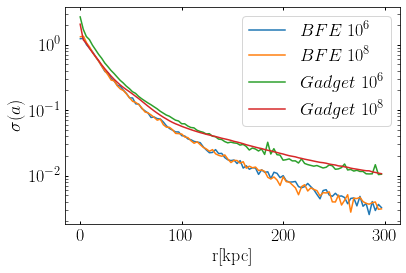

In [123]:
# 

semilogy(rbins6_bfe, a_std6_bfe, label='$BFE\ 10^6$')
semilogy(rbins8_bfe, a_std8_bfe, label='$BFE\ 10^8$')
semilogy(rbins6, a_std6, label='$Gadget\ 10^6$')
semilogy(rbins6, a_std8/100.,  label='$Gadget\ 10^8$')
xlabel('r[kpc]')
ylabel('$\sigma(a)$')
legend()

savefig('a_disp_bfe_gadget_dif_res.pdf', bbox_inches='tight')

# cuts using the variance method:

In [93]:
data = loadtxt('./MW/MW_100M_b1_dm_part_1e6.txt')
mass = data[:,3]

In [90]:
## Reading coefficients 
coeff_c = np.loadtxt('covariance_mw_100M_b1_dm_part1e6.txt')
Scov_mw_1e6 = coeff_c[:,0]
Tcov_mw_1e6 = coeff_c[:,1]

Scov_matrix_mw_1e6 = np.zeros((21, 21, 21))
Tcov_matrix_mw_1e6 = np.zeros((21, 21, 21))


counter = 0
for n in range(21):
    for l in range(21):
        for m in range(0, l+1):
            Scov_matrix_mw_1e6[n][l][m] = Scov_mw_1e6[counter]
            Tcov_matrix_mw_1e6[n][l][m] = Tcov_mw_1e6[counter]
            counter +=1

In [92]:
def smoothing(cov_matrix, coeff, m):
    """
    Coefficients smoothing 
    
    """
    var_coeff = (cov_matrix - m*coeff**2)
    b_nlm = 1/(1 + var_coeff/coeff**2)
    # This line remove nans an put the original values
    b_nlm_values = np.nan_to_num(b_nlm)
    return b_nlm_values

In [96]:
b_smooth_S_1e6 = smoothing(Scov_matrix_mw_1e6, S_matrix_mw_1e6, mass[0])
b_smooth_T_1e6 = smoothing(Tcov_matrix_mw_1e6, T_matrix_mw_1e6, mass[0])


/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [134]:
def copy_matrix(M, indices):
    M_new = np.zeros(shape(M))
    for i in range(len(indices[0])):
        M_new[indices[0][i]][indices[1][i]][indices[2][i]] = M[indices[0][i]][indices[1][i]][indices[2][i]]
    return M_new


def coefficients_smooth_level(S, T, bs, bt, b_cut, verb=0):
    """
    Returns coefficients with energy higher than e_cut
    e_cut : float 
        between 0 and 1
        
    """
 
    bs_cut_index = np.where(bs>b_cut)
    bt_cut_index = np.where(bt>b_cut)
    
    if verb == 1:

        print('N coeff S= ', len(bs_cut_index[0]))
        print('N coeff T= ', len(bt_cut_index[0]))

    S_new = copy_matrix(S, bs_cut_index)
    T_new = copy_matrix(T, bt_cut_index)
    return S_new, T_new, len(bs_cut_index[0]), len(bt_cut_index[0])

In [135]:
b_cuts = [0, 0.3, 0.5, 0.8]
nbins = 100
a_mean_bcuts = np.zeros((len(b_cuts), nbins))
a_std_bcuts = np.zeros((len(b_cuts), nbins))
Ns = np.zeros(len(b_cuts))
Nt = np.zeros(len(b_cuts))

for i in range(len(b_cuts)):
    S_bs0, T_bt0, Ns[i] ,Nt[i] = coefficients_smooth_level(S_matrix_mw_1e6, T_matrix_mw_1e6, b_smooth_S_1e6, b_smooth_T_1e6, b_cuts[i])
    a_b0 = biff.gradient(np.ascontiguousarray(np.double(pos_gadget_1e6[N_rand_1e6])), 
                         S_bs0, T_bt0, G=G_gadget, M=1, r_s=r_s_sims)
    amag_b0 = (a_b0[:,0]**2 + a_b0[:,1]**2 + a_b0[:,2]**2)**0.5 
    rbins_b0, a_mean_bcuts[i], a_std_bcuts[i] = a_r(r_rand_1e6, amag_b0, nbins, 300)


/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


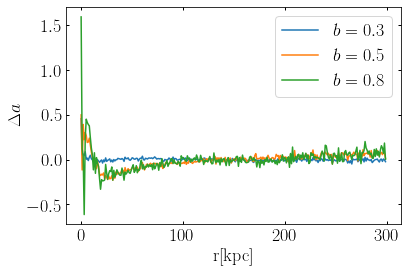

In [128]:
for i in range(1, len(b_cuts)):
    plot(rbins_b0, 100*(a_mean_bcuts[i]/a_mean_bcuts[0] - 1), label='$b={}$'.format(b_cuts[i]))
    legend()
    xlabel('r[kpc]')
    ylabel('$\Delta a$')
    
#savefig('da_vs_smoothing.pdf', bbox_inches='tight')

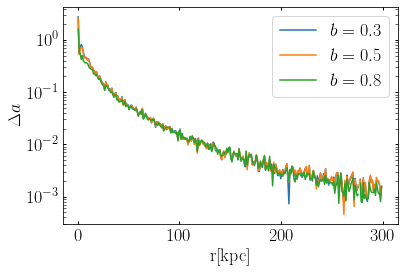

In [131]:
for i in range(1, len(b_cuts)):
    semilogy(rbins_b0, a_std_bcuts[i], label='$b={}$'.format(b_cuts[i]))
    legend()
    xlabel('r[kpc]')
    ylabel('$\Delta a$')

In [136]:
print(Ns, Nt)

[ 4328.  2327.  1422.   226.] [ 3957.  2152.  1332.   213.]


In [176]:
S_bs_opt, T_bt_opt, Ns_opt ,Nt_opt= coefficients_smooth_level(S_matrix_mw_1e6, T_matrix_mw_1e6, b_smooth_S_1e6, b_smooth_T_1e6, 0.5)


/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0,0.5,'$l$')

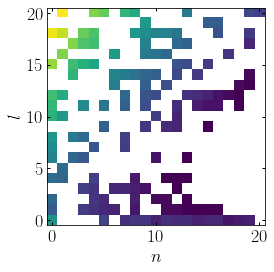

In [146]:
imshow(np.log10(np.abs(S_bs_opt[:,:,0].T)), origin='lower')
xlabel('$n$')
ylabel('$l$')

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0,0.5,'$l$')

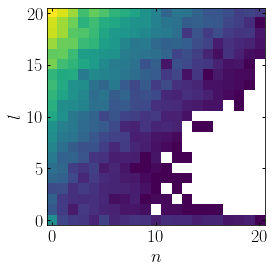

In [174]:
imshow(np.log10(np.abs(S_matrix_mw_1e8[:,:,0].T)), origin='lower')
xlabel('$n$')
ylabel('$l$')

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


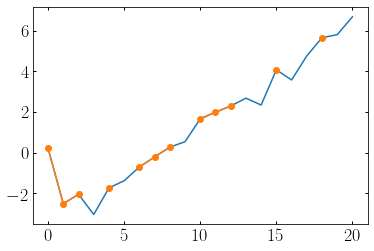

In [152]:
plot(np.log10(np.abs(S_matrix_mw_1e6[0,:,0])))
plot(np.log10(np.abs(S_bs_opt[0,:,0])), '-o')


In [26]:
y_grid = np.arange(-300, 300, 5)
z_grid = np.arange(-300, 300, 5)
y_grid, z_grid = meshgrid(y_grid, z_grid)

In [28]:
rho_mwlmc_all= biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), 
                                                            y_grid.flatten(), 
                                                            z_grid.flatten()]).T), 
                           S_matrix_mw_1e6, 
                           T_matrix_mw_1e6,
                           M=1, r_s=40.8)

rho_matrix_all = reshape(rho_mwlmc_all, (120, 120))



rho_mwlmc_all8= biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), 
                                                            y_grid.flatten(), 
                                                            z_grid.flatten()]).T), 
                           S_matrix_mw_1e8, 
                           T_matrix_mw_1e8,
                           M=1, r_s=40.8)

rho_matrix_all8 = reshape(rho_mwlmc_all8, (120, 120))

In [33]:
rho_mwlmc_all_opt= biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), 
                                                            y_grid.flatten(), 
                                                            z_grid.flatten()]).T), 
                           np.ascontiguousarray(S_matrix_mw_1e6_opt), 
                           np.ascontiguousarray(T_matrix_mw_1e6_opt),
                           M=1, r_s=40.8)

rho_matrix_all_opt = reshape(rho_mwlmc_all_opt, (120, 120))


S_mwlmc_000_opt = np.zeros(shape(S_matrix_mw_1e6))
S_mwlmc_000_opt[0,0,0] = S_matrix_mw_1e6_opt[0,0,0]
T_mwlmc_000_opt = np.zeros(shape(T_matrix_mw_1e6))
T_mwlmc_000_opt[0,0,0] = T_matrix_mw_1e6_opt[0,0,0]

rho_mwlmc_000_opt= biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), 
                                                            y_grid.flatten(), 
                                                            z_grid.flatten()]).T), 
                           np.ascontiguousarray(S_mwlmc_000_opt), 
                           np.ascontiguousarray(T_mwlmc_000_opt),
                           M=1, r_s=40.8)

In [155]:
rho_mwlmc_per = biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), 
                                                            y_grid.flatten(), 
                                                            z_grid.flatten()]).T), 
                           S_bs_opt, 
                           T_bt_opt,
                           M=1, r_s=40.8)

In [157]:
rho_matrix_opt = reshape(rho_mwlmc_per, (120, 120))


In [179]:
S_mwlmc_000 = np.zeros(shape(S_matrix_mw_1e6))
S_mwlmc_000[0,0,0] = S_matrix_mw_1e6[0,0,0]
T_mwlmc_000 = np.zeros(shape(T_matrix_mw_1e6))
T_mwlmc_000[0,0,0] = T_matrix_mw_1e6[0,0,0]

rho_mwlmc_base = biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), 
                                                            y_grid.flatten(), 
                                                            z_grid.flatten()]).T), 
                           S_mwlmc_000, 
                           T_mwlmc_000,
                           M=1, r_s=40.8)


rho_matrix_base = reshape(rho_mwlmc_base, (120, 120))

S_mwlmc_0008 = np.zeros(shape(S_matrix_mw_1e8))
S_mwlmc_0008[0,0,0] = S_matrix_mw_1e8[0,0,0]
T_mwlmc_0008 = np.zeros(shape(T_matrix_mw_1e8))
T_mwlmc_0008[0,0,0] = T_matrix_mw_1e8[0,0,0]

rho_mwlmc_base8 = biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), 
                                                            y_grid.flatten(), 
                                                            z_grid.flatten()]).T), 
                           S_mwlmc_0008, 
                           T_mwlmc_0008,
                           M=1, r_s=40.8)


rho_matrix_base8 = reshape(rho_mwlmc_base8, (120, 120))


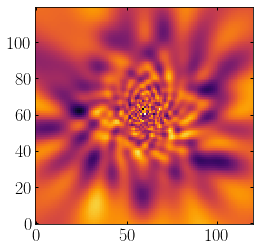

In [35]:
imshow((rho_matrix_all_opt/rho_mwlmc_000_opt.reshape(120,120)).T, origin='lower', cmap='inferno')


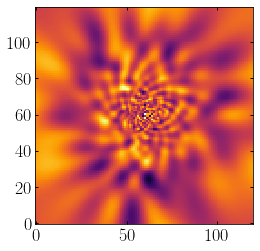

In [182]:
imshow((rho_matrix_opt/rho_matrix_base - 1), origin='lower', cmap='inferno')

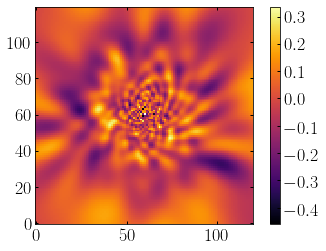

In [183]:
imshow((rho_matrix_all.T/rho_matrix_base.T - 1), origin='lower', cmap='inferno')
colorbar()

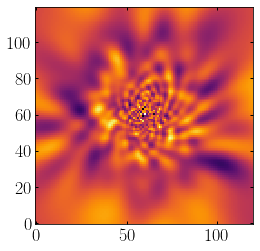

In [181]:
imshow((rho_matrix_all8.T/rho_matrix_base8.T - 1), origin='lower', cmap='inferno')